# Rice Leaf Disease Analysis


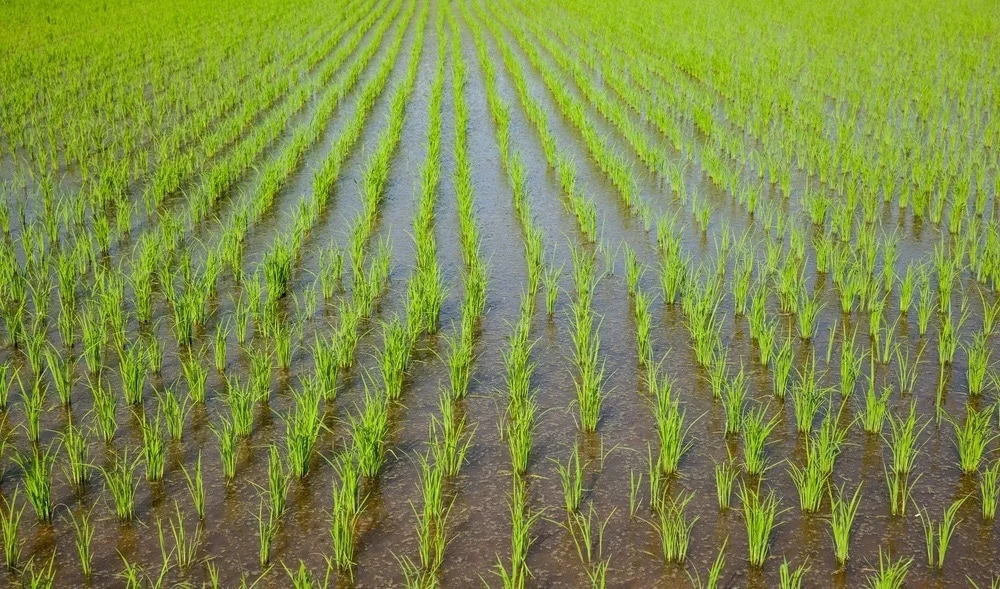

# Data Summary
1. 120 jpg images of various sizes
2. 3 classes --> leaf smut, brown spot and bacterial leaf blight
3. 40 images per class
4. There are no images of normal rice leaves i.e. not disease infected.
5. According to the paper the leaves were placed against a white background before being photographed.
6. There are images in the dataset that appear to have been processed e.g. the background has been removed. Therefore, we have a mixture of raw and processed images.

# Case Study

1. There are images of diseased rice leaf.
2. Here i am going to find out what are the diseas using CNN.
3. I am going to use 5 hidden layer for CNN with RELU activation Function.
4. By using this we are train the model to predict the diseas of rice leaf before hand.
5. So that we'll take apropriate precaution before hand.

### Import all the required packages

In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# Assign all the constant values

In [20]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

# Importing the data-info

In [22]:
pwd

'C:\\Users\\sidhh\\Rice-Leaf'

In [24]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\sidhh\\Rice-Leaf",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 119 files belonging to 3 classes.


In [25]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [26]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 2 2 1 0 1 0 1 1 1 2 0 1 0 1 1 1 0 0 2 2 1 2 1 1 1 2 0 2 0 0]


# Visulization

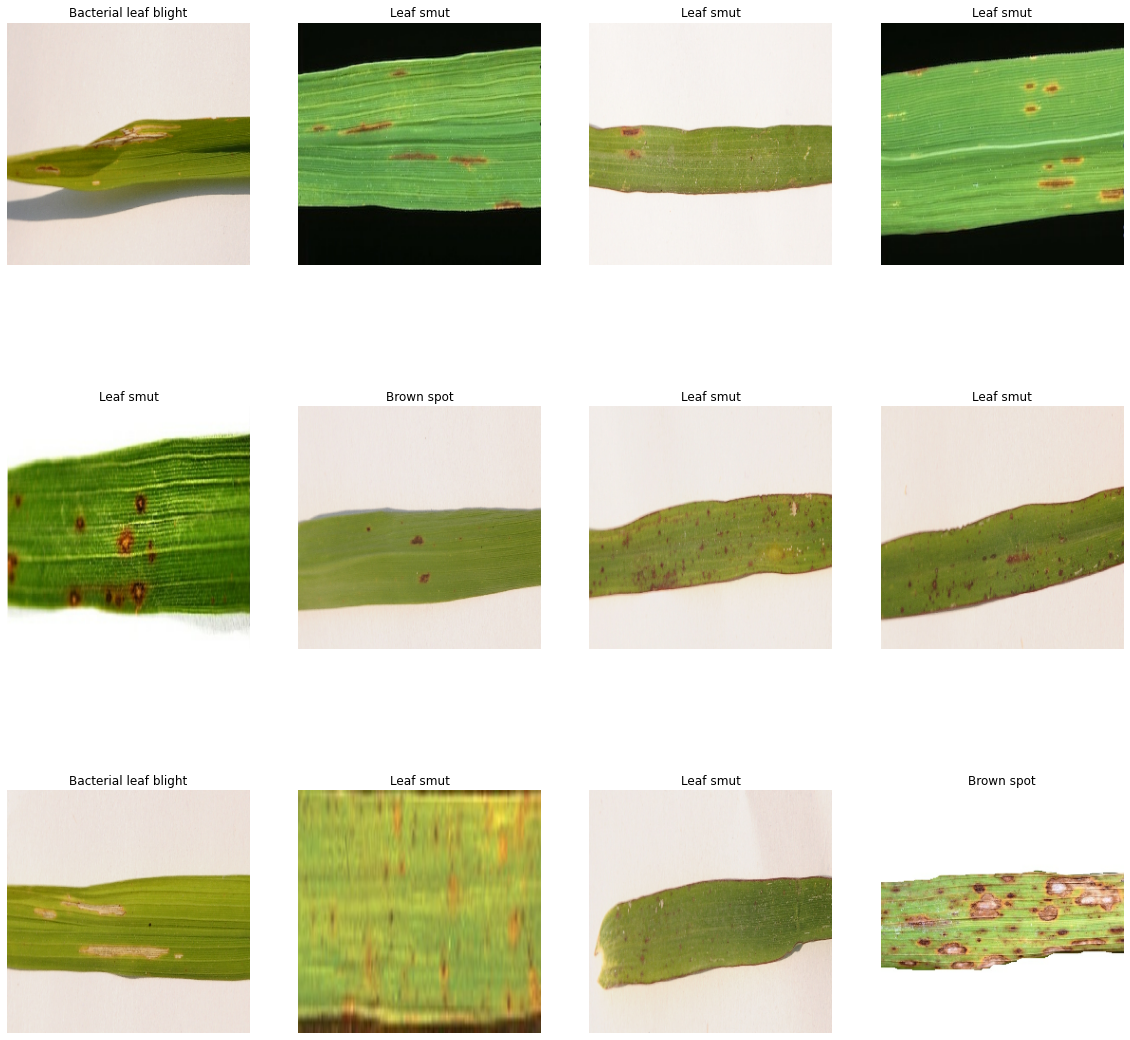

In [27]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Split the Dataset
Dataset should be bifurcated into 3 subsets, namely:

1.Training: Dataset to be used while training

2.Validation: Dataset to be tested against while training

3.Test: Dataset to be tested against after we trained a model

In [28]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [29]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Image Preprocessing

In [30]:
 #Resize the images, if there are images are of smaller size the it convert in 256*256 pixel

resize_and_rescale = tf.keras.Sequential([                  
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [31]:
# It changes the dimension and colour saturation to better understand the data by the model

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [32]:
# Apply data_augmentation to the train data

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model creation using CNN

In [33]:
# Here i am created 5 hidden layer of CNN using relu activation function


input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [34]:
model.summary()   #This gives the summery of the model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 60, 60, 64)         

# Compiling the Model

In [35]:
#We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
#Run the model for traing purpose

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 1.1610 - accuracy: 0.2874
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 1.0956 - accuracy: 0.3563
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 1.0888 - accuracy: 0.4375
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 1.0612 - accuracy: 0.4713
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 1.0005 - accuracy: 0.4828
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 1.0023 - accuracy: 0.4713
Epoch 7/50
3/3 [==============================] - 6s 2s/step - loss: 0.9884 - accuracy: 0.5172
Epoch 8/50
3/3 [==============================] - 6s 2s/step - loss: 0.9931 - accuracy: 0.4368
Epoch 9/50
3/3 [==============================] - 6s 2s/step - loss: 0.9237 - accuracy: 0.5172
Epoch 10/50
3/3 [==============================] - 6s 2s/step - loss: 0.9487 - accuracy: 0.5862
Epoch 11/50
3/3 [==============================] 

In [37]:
scores = model.evaluate(test_ds)  #Model evaluation of test data

1/1 [==============================] - 1s 1s/step - loss: 0.2549 - accuracy: 0.9062


In [38]:
scores = model.evaluate(train_ds)   ##Model evaluation of train data

3/3 [==============================] - 3s 637ms/step - loss: 0.3822 - accuracy: 0.8391


### Insights

**Here we can see that the accuracy of the model with test data is 90% but with train data it gives 83%**

**It seems the model was Overfitting**

**I am going to try tuning to check the model performance.**

# Dropout Function

In [39]:
#Here i am goint to use dropout function to check the model performance using different parameter
#I am creating a function using different parameter with 5 hidden layer using relu activition function

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [40]:
#Compile the model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
#Run the model for traing purpose

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
3/3 [==============================] - 8s 2s/step - loss: 2.1632 - accuracy: 0.3908
Epoch 2/50
3/3 [==============================] - 8s 2s/step - loss: 1.1385 - accuracy: 0.3542
Epoch 3/50
3/3 [==============================] - 7s 2s/step - loss: 1.0965 - accuracy: 0.3542
Epoch 4/50
3/3 [==============================] - 7s 2s/step - loss: 1.1057 - accuracy: 0.3218
Epoch 5/50
3/3 [==============================] - 7s 2s/step - loss: 1.1070 - accuracy: 0.3448
Epoch 6/50
3/3 [==============================] - 7s 2s/step - loss: 1.1011 - accuracy: 0.3333
Epoch 7/50
3/3 [==============================] - 7s 2s/step - loss: 1.1023 - accuracy: 0.3021
Epoch 8/50
3/3 [==============================] - 7s 2s/step - loss: 1.0967 - accuracy: 0.3563
Epoch 9/50
3/3 [==============================] - 7s 2s/step - loss: 1.1005 - accuracy: 0.2529
Epoch 10/50
3/3 [==============================] - 7s 2s/step - loss: 1.0955 - accuracy: 0.3448
Epoch 11/50
3/3 [==============================] 

In [42]:
scores = model.evaluate(test_ds)    #Model evaluation of test data

1/1 [==============================] - 1s 981ms/step - loss: 0.6871 - accuracy: 0.7188


In [43]:
scores = model.evaluate(train_ds)   #Model evaluation of train data

3/3 [==============================] - 3s 590ms/step - loss: 0.6880 - accuracy: 0.7500


In [44]:
scores

[0.6880176067352295, 0.75]

### Insights

**Here i am getting a accuracy score of 71% with test data and 75% for train data.**

**It is a pretty good accuracy to consider.**

In [46]:
history.params #this gives the best parameters using the model above

{'verbose': 1, 'epochs': 50, 'steps': 3}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [48]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.1631574630737305,
 1.1385170221328735,
 1.0964547395706177,
 1.1056923866271973,
 1.1069996356964111]

# Plot accuracy and loss Curve

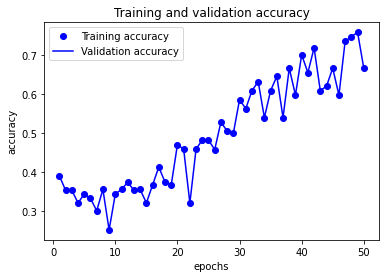

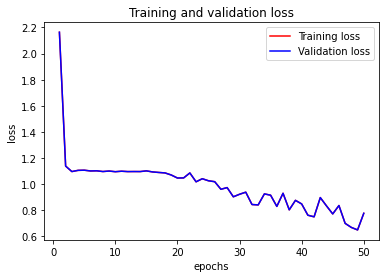

In [49]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_loss = history.history["loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Predict on a sample image

first image to predict
actual label: Leaf smut
1/1 [==============================] - 1s 674ms/step
predicted label: Leaf smut


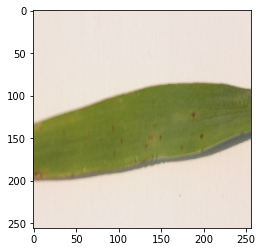

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Prediction on few sample

In [51]:
# To check the model proper working or not.

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


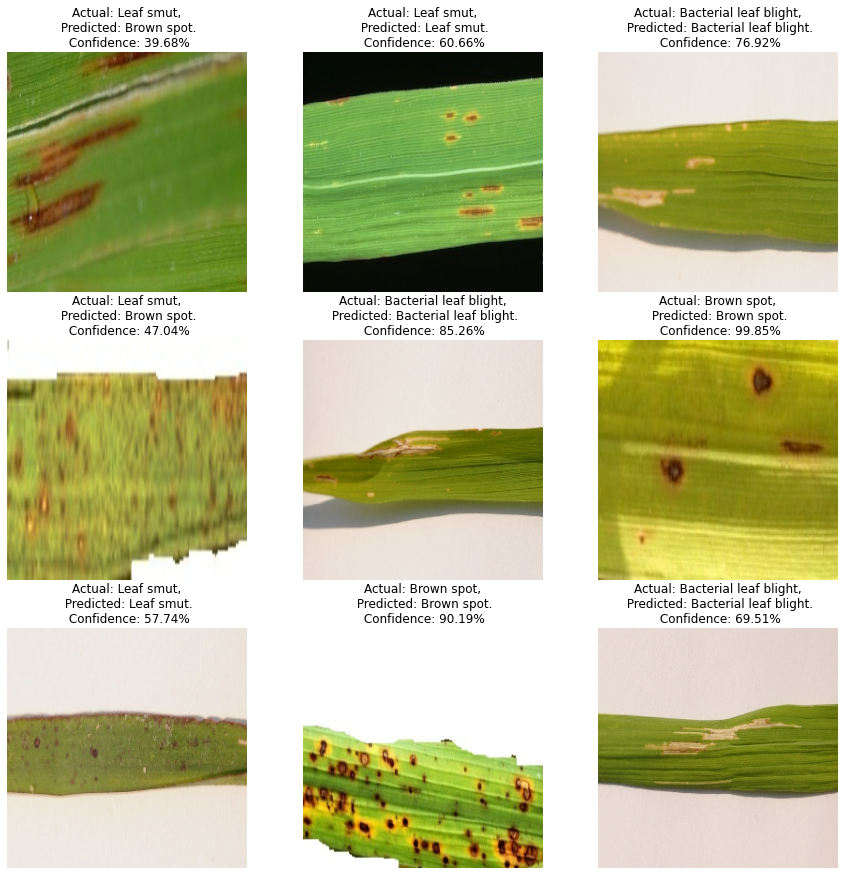

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Conclusion

#### I have trained the model with tensorflow libeary.
#### It gives accuracy of 71%, which is good accuray score.
#### To check the model i try to predict with 9 images it predict correctly for 7 images.
#### It means the model was working properly with these parameters. And gives good prediction.


### Thank You.